In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregar os dados
df = pd.read_csv("steam.csv")

# Selecionar colunas relevantes
colunas_relevantes = [
    'price', 'release_date', 'english', 'developer', 'required_age',
    'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime'
]
df = df[colunas_relevantes]
df = df.dropna()

# Extrair ano de lançamento
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# Remover registros com ano inválido
df = df.dropna(subset=['release_year'])




In [4]:
# Criar variável de classificação
df['total_ratings'] = df['positive_ratings'] + df['negative_ratings']
df = df[df['total_ratings'] >= 100]
df['rating_ratio'] = df['positive_ratings'] / df['total_ratings']
df['is_good_game'] = df['rating_ratio'].apply(lambda x: 1 if x > 0.75 else 0)

# Reduzir número de developers (top 50)
top_devs = df['developer'].value_counts().nlargest(50).index
df['developer'] = df['developer'].apply(lambda x: x if x in top_devs else 'outros')

# Reduzir o tamanho do dataset para acelerar
# df = df.sample(n=5000, random_state=42)



<ipython-input-4-65befab29212>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_ratio'] = df['positive_ratings'] / df['total_ratings']
<ipython-input-4-65befab29212>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_good_game'] = df['rating_ratio'].apply(lambda x: 1 if x > 0.75 else 0)
<ipython-input-4-65befab29212>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [5]:
# Selecionar features e alvo
X = df[['price', 'release_year', 'required_age', 'positive_ratings', 'negative_ratings',
        'average_playtime', 'median_playtime', 'english', 'developer']]
y = df['is_good_game']

# Pré-processamento
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), ['price', 'release_year', 'required_age', 'positive_ratings',
                               'negative_ratings', 'average_playtime', 'median_playtime']),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['developer'])
])

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dicionário de modelos
modelos = {
    "Árvore de Decisão": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM Linear": SGDClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Armazenar resultados
resultados = []




🔍 Árvore de Decisão
              precision    recall  f1-score   support

        Ruim       0.97      0.97      0.97       681
         Bom       0.98      0.98      0.98      1072

    accuracy                           0.98      1753
   macro avg       0.98      0.98      0.98      1753
weighted avg       0.98      0.98      0.98      1753



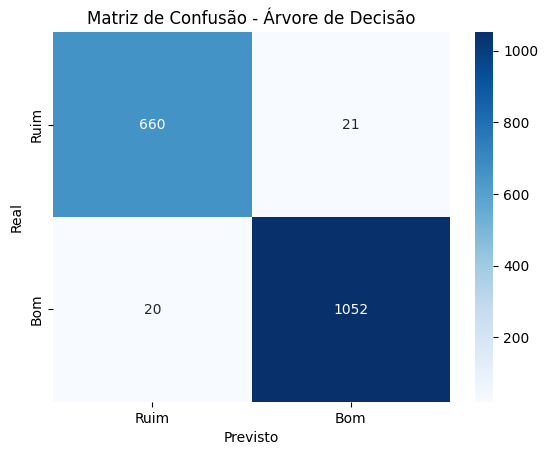


🔍 Random Forest
              precision    recall  f1-score   support

        Ruim       0.95      0.89      0.92       681
         Bom       0.93      0.97      0.95      1072

    accuracy                           0.94      1753
   macro avg       0.94      0.93      0.93      1753
weighted avg       0.94      0.94      0.94      1753



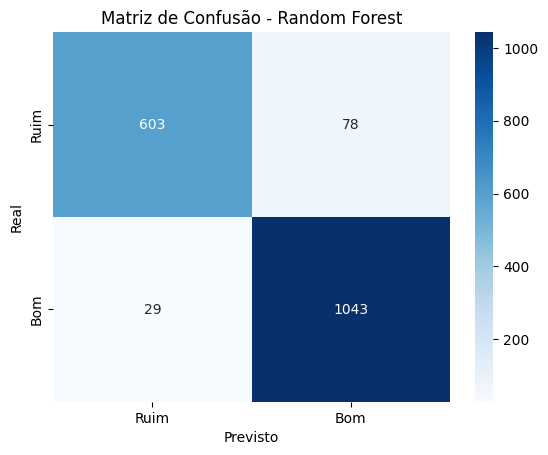


🔍 SVM Linear
              precision    recall  f1-score   support

        Ruim       0.77      0.55      0.64       681
         Bom       0.76      0.90      0.82      1072

    accuracy                           0.76      1753
   macro avg       0.76      0.72      0.73      1753
weighted avg       0.76      0.76      0.75      1753



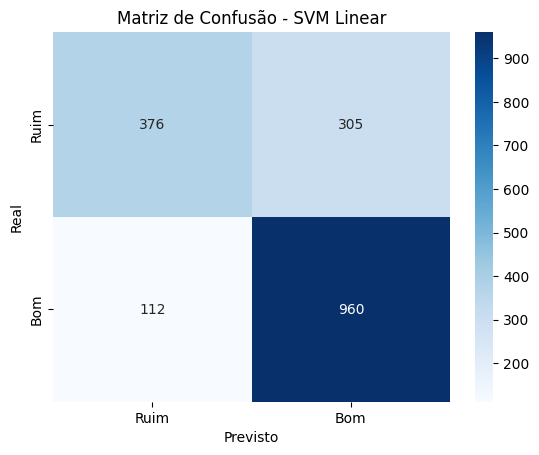


🔍 Naive Bayes
              precision    recall  f1-score   support

        Ruim       0.40      0.99      0.57       681
         Bom       0.89      0.06      0.11      1072

    accuracy                           0.42      1753
   macro avg       0.64      0.52      0.34      1753
weighted avg       0.70      0.42      0.29      1753



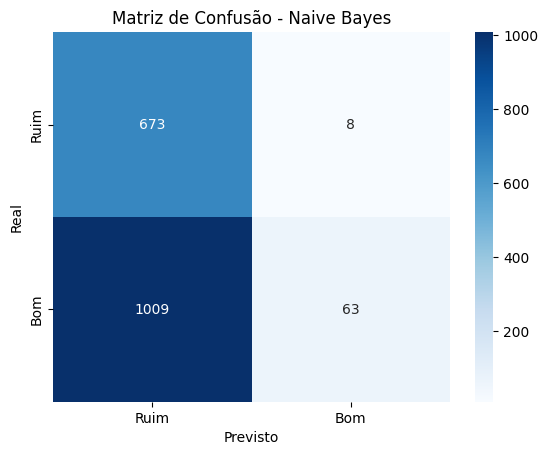


📊 Comparação de Desempenho dos Modelos:
              Modelo  Acurácia  Precision (Bom)  Recall (Bom)  F1-score (Bom)
0  Árvore de Decisão  0.976612         0.980429      0.981343        0.980886
1      Random Forest  0.938962         0.930419      0.972948        0.951208
2         SVM Linear  0.762122         0.758893      0.895522        0.821566
3        Naive Bayes  0.419852         0.887324      0.058769        0.110236


<ipython-input-6-fb57a0acc8f7>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados_df, x="Modelo", y="Acurácia", palette="viridis")


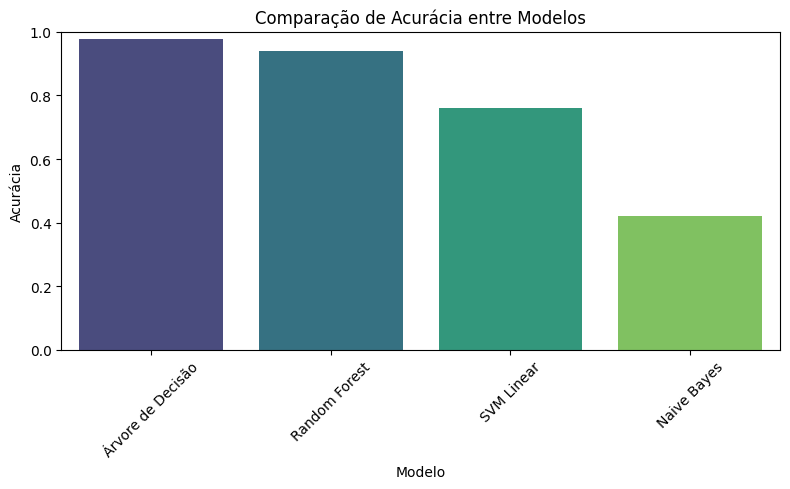

<ipython-input-6-fb57a0acc8f7>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resultados_df, x="Modelo", y="F1-score (Bom)", palette="viridis")


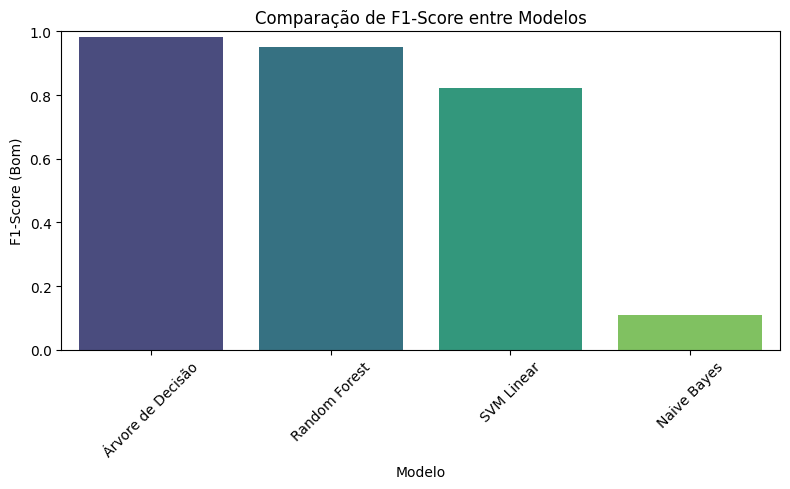

In [6]:
# Avaliação
for nome, modelo in modelos.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', modelo)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    resultados.append({
        "Modelo": nome,
        "Acurácia": acc,
        "Precision (Bom)": report['1']['precision'],
        "Recall (Bom)": report['1']['recall'],
        "F1-score (Bom)": report['1']['f1-score']
    })

    print(f"\n🔍 {nome}")
    print(classification_report(y_test, y_pred, target_names=["Ruim", "Bom"]))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ruim", "Bom"], yticklabels=["Ruim", "Bom"])
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

# Criar DataFrame com resultados
resultados_df = pd.DataFrame(resultados)
print("\n📊 Comparação de Desempenho dos Modelos:")
print(resultados_df)

# Gráfico de Acurácia
plt.figure(figsize=(8, 5))
sns.barplot(data=resultados_df, x="Modelo", y="Acurácia", palette="viridis")
plt.title("Comparação de Acurácia entre Modelos")
plt.ylabel("Acurácia")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de F1-score (opcional)
plt.figure(figsize=(8, 5))
sns.barplot(data=resultados_df, x="Modelo", y="F1-score (Bom)", palette="viridis")
plt.title("Comparação de F1-Score entre Modelos")
plt.ylabel("F1-Score (Bom)")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()